# Kr83m S2 Area Fraction Comparison Runs

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from matplotlib.image import NonUniformImage
from matplotlib.patches import Rectangle
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

import pandas as pd

## Ratio Dead

In [2]:
run_id     = np.array([157,158,159,161,162,163,186,187,188,189,190,191,192,196,201])
ratio_dead = np.array([.414,.293,.479,.553,.984,.308,.389,.742,.945,.971,.980,.162,.943,.963,.986])
U_amp_kV   = np.array([4.0,3.5,3.0,2.0,4.5,4.0,4.0,3.5,3.0,2.5,2.0,4.5,3.0,3.0,3.0])

In [3]:
bunch1 = (run_id >= 157) & (run_id < 163)
bunch2 = (run_id >= 186) & (run_id <= 191)

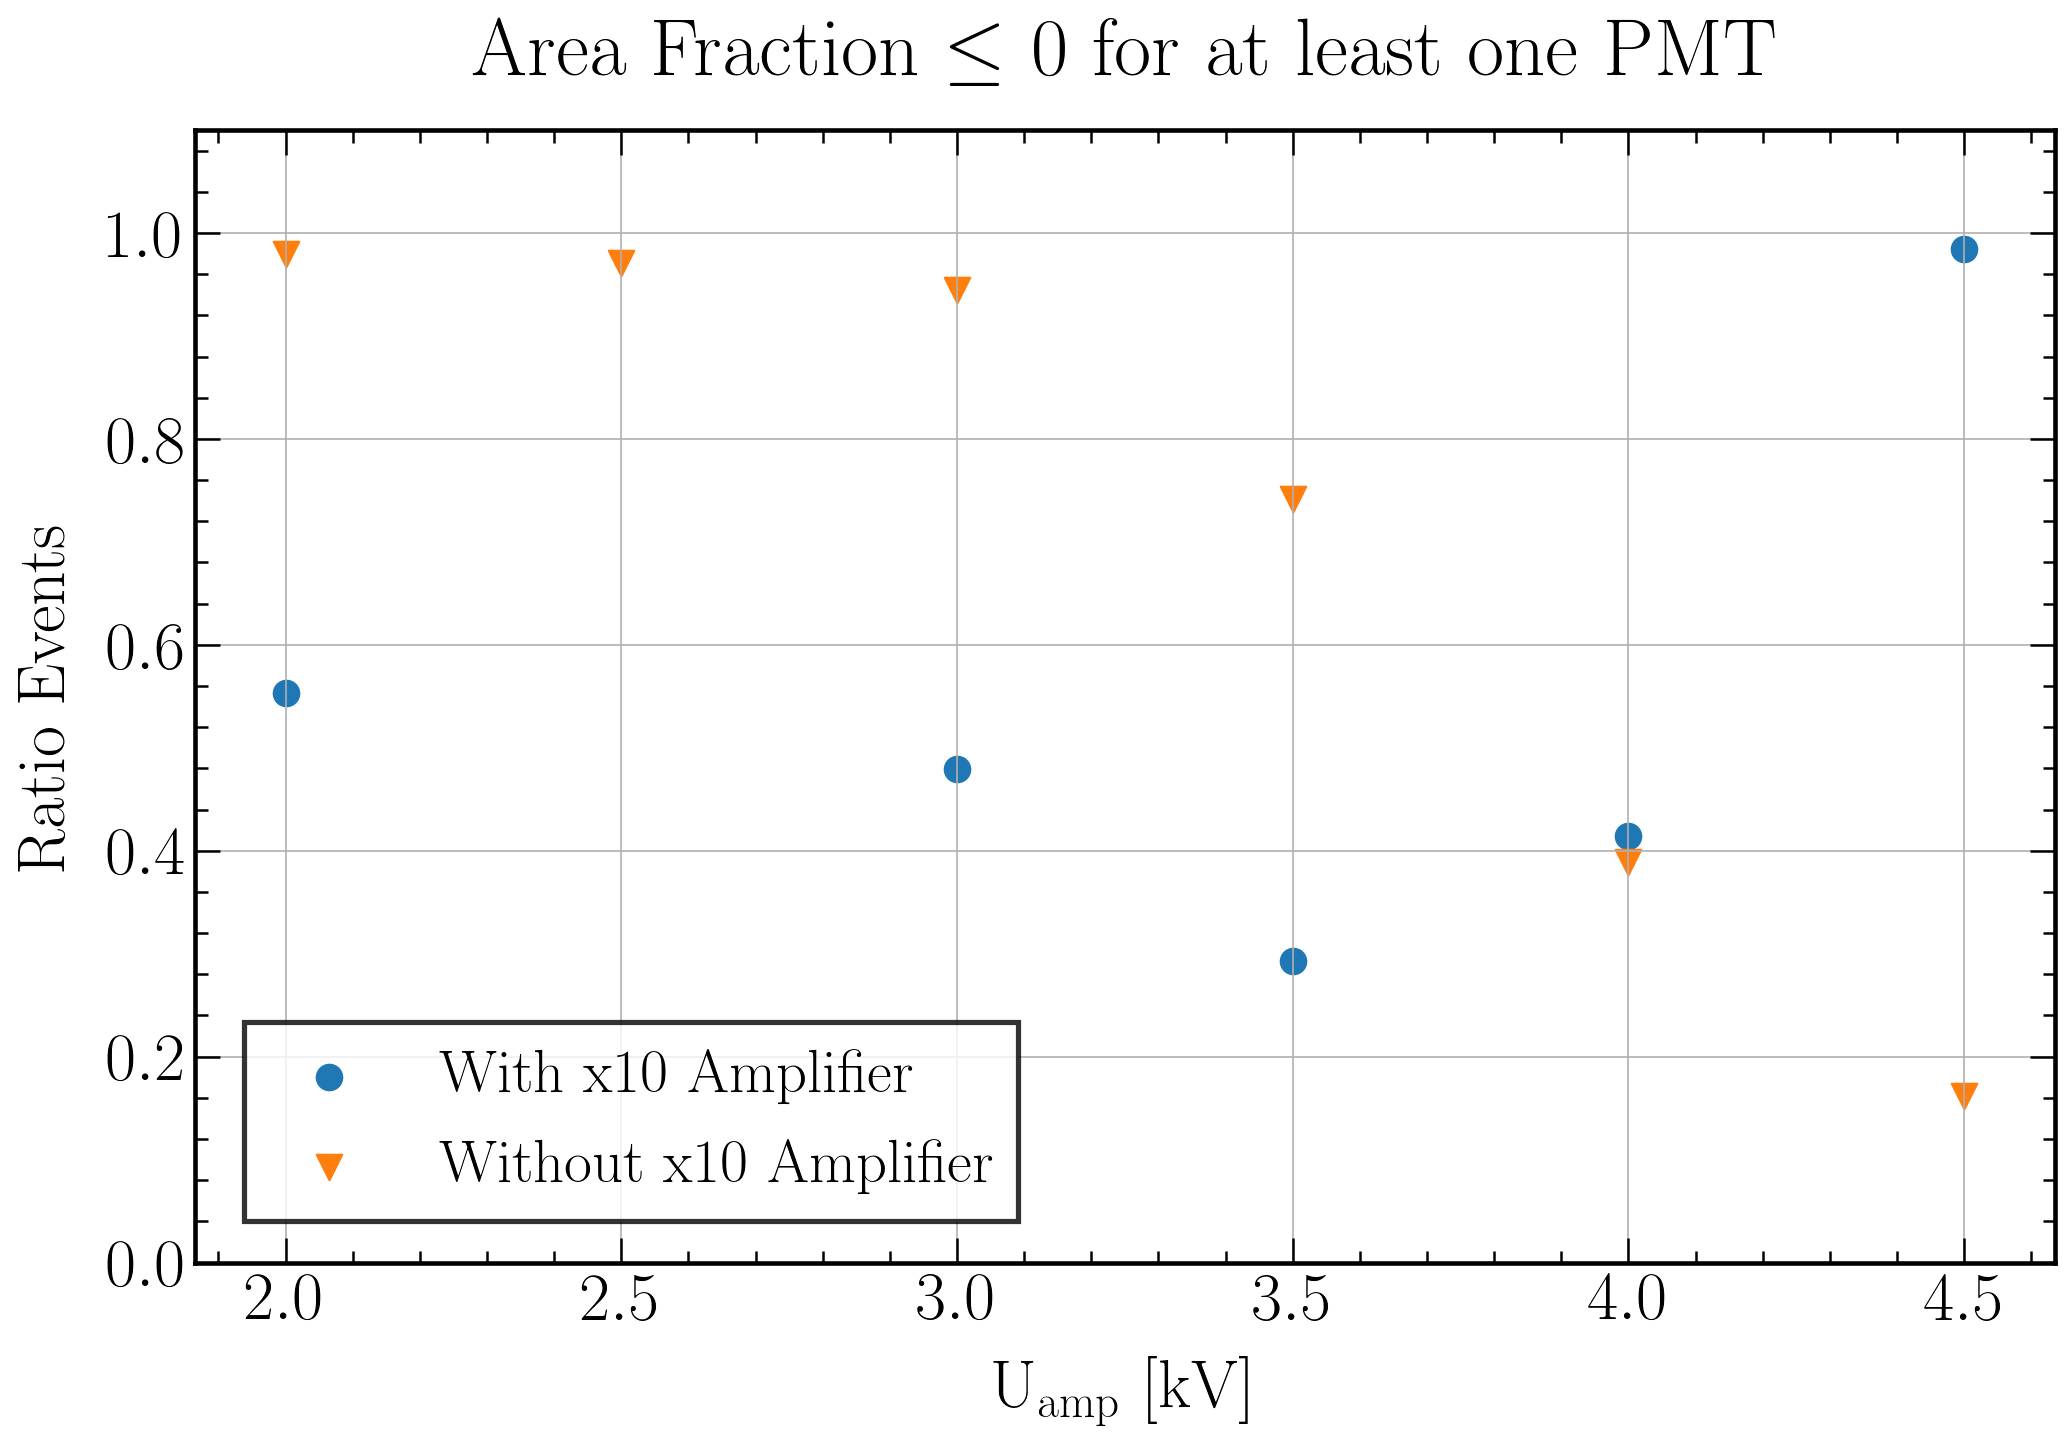

In [4]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot
plt.scatter(U_amp_kV[bunch1], ratio_dead[bunch1], s = 150, marker="o", label = "With x10 Amplifier")
plt.scatter(U_amp_kV[bunch2], ratio_dead[bunch2], s = 150, marker="v", label = "Without x10 Amplifier")

plt.xlabel('$\mathrm{U}_{\mathrm{amp}}$ [kV]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('Ratio Events', fontsize = label_size, labelpad = label_pad)
plt.title('Area Fraction $\leq$ 0 for at least one PMT', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=3, bbox_to_anchor=(0.01,0.01), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
leg.get_title().set_fontsize(0.9*label_size)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)
leg._legend_box.align = "left"

# Axes ---> Range
#plt.xlim(0,100)
plt.ylim(0.0,1.1)
#plt.xlim(left=0)
#plt.yscale('log', nonposy='clip')

fig.savefig("Dead_Channel_Influence_Uamp.png")
plt.show()